# Chapter 87: Pandas - analysing CSV-loaded DataFrames

## Analyzing CSV-loaded DataFrames

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
df = pd.read_csv('random_sales.csv', parse_dates=['Date'], date_format='%Y-%m-%d')
df

Date Product   Price  Quantity
0   2045-01-01   Phone  112.55        14
1   2045-01-02  Tablet  158.05         8
2   2045-01-03   Phone   50.02         7
3   2045-01-04  Camera   95.35         8
4   2045-01-05   Phone   72.01        13
..         ...     ...     ...       ...
995 2047-09-23  Camera  196.16         5
996 2047-09-24  Tablet   96.76         6
997 2047-09-25   Phone  150.32        10
998 2047-09-26   Phone   98.90         6
999 2047-09-27  Tablet  166.17         3

[1000 rows x 4 columns]

In [3]:
df.shape

(1000, 4)

In [4]:
df.dtypes

Date        datetime64[ns]
Product             object
Price              float64
Quantity             int64
dtype: object

In [5]:
df.describe()

Date        Price    Quantity
count                           1000  1000.000000  1000.00000
mean   2046-05-15 11:59:59.999999488   125.090560     7.28100
min              2045-01-01 00:00:00    50.020000     1.00000
25%              2045-09-07 18:00:00    87.787500     4.00000
50%              2046-05-15 12:00:00   126.125000     7.00000
75%              2047-01-20 06:00:00   162.597500    11.00000
max              2047-09-27 00:00:00   199.600000    14.00000
std                              NaN    43.275088     4.03464

In [6]:
df.values

array([[Timestamp('2045-01-01 00:00:00'), 'Phone', 112.55, 14],
       [Timestamp('2045-01-02 00:00:00'), 'Tablet', 158.05, 8],
       [Timestamp('2045-01-03 00:00:00'), 'Phone', 50.02, 7],
       ...,
       [Timestamp('2047-09-25 00:00:00'), 'Phone', 150.32, 10],
       [Timestamp('2047-09-26 00:00:00'), 'Phone', 98.9, 6],
       [Timestamp('2047-09-27 00:00:00'), 'Tablet', 166.17, 3]],
      dtype=object)

## Grouping data in DataFrames

In [7]:
product_sales = df.groupby('Product')['Quantity'].sum()
product_sales

Product
Camera    2461
Phone     2436
Tablet    2384
Name: Quantity, dtype: int64

In [8]:
type(product_sales)

pandas.core.series.Series

In [9]:
average_price = df.groupby('Product')['Price'].mean()
average_price

Product
Camera    123.840199
Phone     124.764112
Tablet    126.748079
Name: Price, dtype: float64

## Displaying Series data on Plots using Matplotlib

In [10]:
product_sales.index

Index(['Camera', 'Phone', 'Tablet'], dtype='object', name='Product')

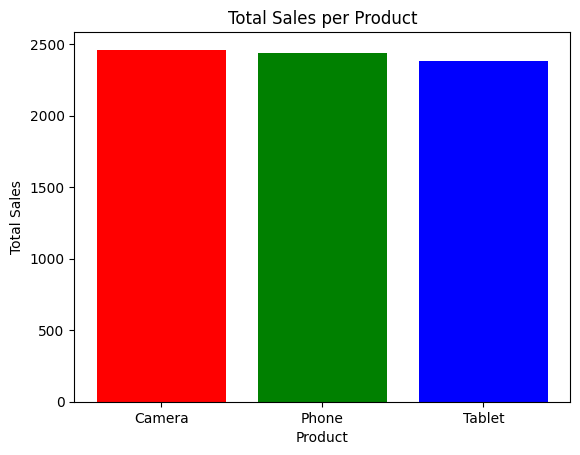

In [14]:
plt.bar(product_sales.index, product_sales.values, color=['red', 'green', 'blue'])
plt.title('Total Sales per Product')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.show()

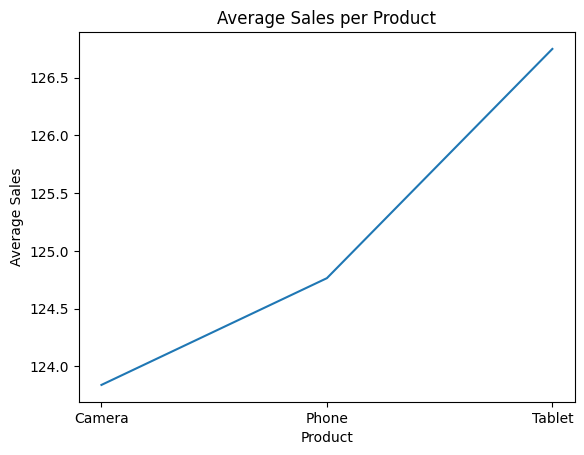

In [15]:
plt.plot(average_price.index, average_price.values)
plt.title('Average Sales per Product')
plt.xlabel('Product')
plt.ylabel('Average Sales')
plt.show()